In [1]:
import pandas as pd
import numpy as np

In [2]:
### 1 ЗАДАНИЕ ###
df = pd.read_csv('restaurants.csv', sep=',')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
vendor_id            784 non-null int64
chain_id             784 non-null int64
city_name            784 non-null object
specialisation       784 non-null object
successful_orders    784 non-null float64
fail_orders          784 non-null float64
reorders             784 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 43.0+ KB
None


In [7]:
### 2 ЗАДАНИЕ ###
print('count of entries = {}'.format(df.shape[0]))

count = 784


In [8]:
### 3 ЗАДАНИЕ ###
print('count of column = {}'.format(df.shape[1]))

count of column = 7


In [22]:
### 4 ЗАДАНИЕ ###
print('count of unique cities = {}'.format(df['city_name'].nunique()))

count of unique cities = 63


In [41]:
df.columns

Index(['vendor_id', 'chain_id', 'city_name', 'specialisation',
       'successful_orders', 'fail_orders', 'reorders'],
      dtype='object')

In [40]:
df.head()

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0


In [39]:
df.describe()

,vendor_id,chain_id,successful_orders,fail_orders,reorders
count,784.000000,784.000000,784.000000,784.000000,784.000000
mean,28054.003827,19386.003827,115.344388,2.576531,2.256378
std,9705.712916,7942.891996,176.792621,5.361445,5.374062
min,1847.000000,872.000000,0.000000,0.000000,0.000000
25%,22165.250000,13973.250000,14.750000,0.000000,0.000000
50%,30821.500000,20972.000000,53.500000,1.000000,1.000000
75%,36508.000000,26811.250000,142.250000,3.000000,2.000000
max,37926.000000,27791.000000,1644.000000,70.000000,65.000000


In [38]:
df.describe(include=['object'])

,city_name,specialisation
count,784,784
unique,63,27
top,Ульяновск,Суши
freq,14,329


In [26]:
### 5 ЗАДАНИЕ ###
df_fish = df[df.specialisation == 'Рыба']
print('count of fish restaurants = {}'.format(df_fish.shape[0]))

count of fish restaurants = 30


In [70]:
### 6 ЗАДАНИЕ ###
print('mean of successful orders = {}'.format(round(df['successful_orders'].mean())))

mean of successful orders = 115


In [61]:
### 7 ЗАДАНИЕ ###
min = df.groupby(by = 'city_name')['vendor_id'].count().min()
s_min = (df.groupby(by = 'city_name')['vendor_id'].count() == min)
s_min[(s_min == True)]

city_name
Ханты-Мансийск    True
Name: vendor_id, dtype: bool

In [62]:
### 8 ЗАДАНИЕ ###
df_20 = df[df.fail_orders > 20]
print('count > 20 = {}'.format(df_20.shape[0]))

count > 20 = 10


In [66]:
### 9 ЗАДАНИЕ ###
df_20_500 = df[(df.fail_orders > 20) & (df.successful_orders < 500)]
print('20 < count < 500 = {}'.format(df_20_500.shape[0]))

20 < count < 500 = 5


In [71]:
### 10 ЗАДАНИЕ ###
df_bakery = df[df.specialisation == 'Выпечка']
print('mean of bakery = {}'.format(round(df_bakery['successful_orders'].mean())))

mean of bakery = 13


In [31]:
### 11 ЗАДАНИЕ ###
df_spec = df[['specialisation', 'successful_orders', 'fail_orders', 'reorders']]
d = dict()
k = 0
for s in df.specialisation:
    if s in d:
        d[s][0] += df_spec.at[k, 'successful_orders']
        d[s][1] += df_spec.at[k, 'fail_orders']
        d[s][2] += df_spec.at[k, 'reorders']
    else:
        d.update({s: [df_spec.at[k, 'successful_orders'], df_spec.at[k, 'fail_orders'], df_spec.at[k, 'reorders']]})
    k += 1
key = 'Супы'
orders = d[key][0] + d[key][1] + d[key][2]
max = d[key][1] / orders
for k in d.keys():
    orders = d[k][0] + d[k][1] + d[k][2] 
    if (d[k][1] / orders) > max:
        max = d[k][1] / orders
        key = k
print('answer: {}'.format(key))

answer: Вегетарианское меню


In [72]:
### 12 ЗАДАНИЕ ###
df_burgers = df[df.specialisation == 'Бургеры']
print('max of burgers = {}'.format(round(df_burgers['successful_orders'].max())))

max of burgers = 506.0


In [3]:
### 13 ЗАДАНИЕ ###
df_sushi = df[(df.specialisation == 'Суши') & (df.city_name == 'Белгород')][['successful_orders']]
print('mean of sushi = {}'.format(round(df_sushi['successful_orders'].mean())))

mean of sushi = 328


In [17]:
### 14 ЗАДАНИЕ ###
print(df.head())
df_1 = pd.read_csv('restaurant_scores.csv', sep=',')
df_1.columns = ['vendor_id', 'model_score']
print(df_1.head())
df_new = pd.merge(df, df_1, on='vendor_id')
print(df_new.head())
print('answer = {}'.format(df_new[df_new.chain_id == 27399][['model_score']].mean().max()))

   vendor_id  chain_id    city_name specialisation  successful_orders  \
0      28957     20633  Архангельск           Супы                0.0   
1      37381     27399  Архангельск         Пироги                0.0   
2      28703     20431  Архангельск           Суши              111.0   
3      37382     27399  Архангельск         Пироги                1.0   
4      36877     27151  Архангельск        Бургеры               22.0   

   fail_orders  reorders  
0          2.0       0.0  
1          0.0       0.0  
2          3.0       0.0  
3          0.0       0.0  
4          2.0       0.0  
   vendor_id  model_score
0          1     0.622864
1          2     0.331360
2          3     0.450092
3          4     0.240392
4          5     0.297691
   vendor_id  chain_id    city_name specialisation  successful_orders  \
0      28957     20633  Архангельск           Супы                0.0   
1      37381     27399  Архангельск         Пироги                0.0   
2      28703     20431  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

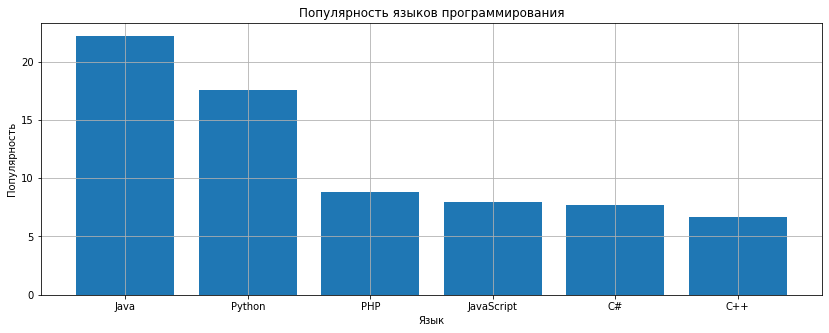

In [47]:
### 15 ЗАДАНИЕ ###
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
fig = plt.figure(figsize= (14,5))
ax = fig.add_subplot()
ax.set_xlabel('Язык')
ax.set_ylabel('Популярность')
ax.set_title('Популярность языков программирования')
ax.grid()
ax.bar(x, popularity) 

    Unnamed: 0   chain_name        lon        lat  orders
30          30      Zvjezda  37.718238  55.794452       4
31          31    Amazonija  37.748619  55.791744       5
32          32      Spasibo  37.728523  55.818736       0
33          33   Gurman_msk  37.734201  55.783089       0
34          34  Super_Papas  37.751179  55.780795       0


Text(0.5, 0, 'Заказы')

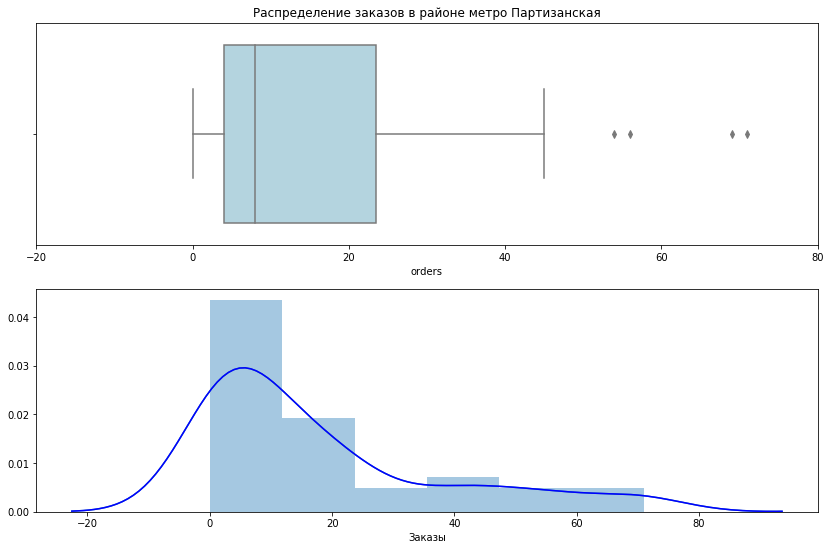

In [26]:
# 16 ЗАДАНИЕ ###
import seaborn as sns
partizan = pd.read_excel('лекции/Лекция 2_МАИ_0710/files/lesson_2/partizan.xlsx')
print(partizan.tail())
fig = plt.figure(figsize= (14,9))
ax1 = fig.add_subplot(211)
ax1.set_xlim(-20,80)
ax1.set_title('Распределение заказов в районе метро Партизанская')
sns.boxplot( x="orders", data=partizan[partizan.orders.isin(np.arange(-20,80))], orient="h", color="LightBlue")
ax2 = fig.add_subplot(212)
sns.distplot(partizan['orders'].dropna(), kde=True)
sns.kdeplot(partizan.orders, color="Blue", legend=False)
ax2.set_xlabel('Заказы')